In [1]:
%cd ..

/home/mounim/PHD-Projects/GES


In [2]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
from Bio.pairwise2 import format_alignment
from src import dataset_simulator
import networkx as nx



In [3]:
## Binary tree
### N generations
id = "divergent_dataset"
L = 100 # len of sequence
mutation_rate = 0.01
generations = 10 # N = g!
random_sequence = dataset_simulator.generate_random_seq(L) #sequence of lenght L

# make binary dataset 
simulated_dataset = dataset_simulator.make_binray_tree(random_sequence, generations = generations, mutation_rate = mutation_rate, mutation_types='S', distribution = 'random')

dataset_simulator.dict_to_fasta(simulated_dataset , './data/simulation_dataset/' , filename = id)


In [4]:
# make dict
simulated_dataset = {}
f = open('./data/simulation_dataset/' + id + '.fasta', 'r').read().split('\n')
i = 0
while i + 1 < len(f) :
    simulated_dataset[f[i].replace('>','')] = f[i+1]
    i+=2

## SPLIT TRAIN / TEST

In [5]:


original_dataset = simulated_dataset

train_dataset = {}
test_dataset = {}

for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G < 9:
        train_dataset[id] = simulated_dataset[id]
    else:
        test_dataset[id] = simulated_dataset[id]


In [6]:
from Bio import pairwise2
from Bio import Align

# 1. pairwise align
id = "uniform_dataset"
path = './data/tmp/'

simulated_dataset = train_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

,Gen0:N0,Gen1:N1,Gen1:N2,Gen2:N3,Gen2:N4,Gen2:N5,Gen2:N6,Gen3:N7,Gen3:N8,Gen3:N9,...,Gen8:N501,Gen8:N502,Gen8:N503,Gen8:N504,Gen8:N505,Gen8:N506,Gen8:N507,Gen8:N508,Gen8:N509,Gen8:N510
Gen0:N0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,8.0,8.0,6.9,6.9,8.0,8.0,8.0,8.0,8.0,8.0
Gen1:N1,1.0,0.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,...,9.0,9.0,7.9,7.9,9.0,9.0,9.0,9.0,9.0,9.0
Gen1:N2,1.0,2.0,0.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,...,7.0,7.0,5.9,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Gen2:N3,2.0,1.0,3.0,0.0,2.0,4.0,4.0,1.0,1.0,3.0,...,10.0,10.0,8.9,8.9,10.0,10.0,10.0,10.0,10.0,10.0
Gen2:N4,2.0,1.0,3.0,2.0,0.0,4.0,4.0,3.0,3.0,1.0,...,10.0,10.0,8.9,8.9,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gen8:N506,8.0,9.0,7.0,10.0,10.0,8.0,6.0,11.0,11.0,11.0,...,8.0,8.0,4.0,4.0,2.0,0.0,6.0,6.0,6.0,6.0
Gen8:N507,8.0,9.0,7.0,10.0,10.0,8.0,6.0,11.0,11.0,11.0,...,8.0,8.0,6.0,6.0,5.0,6.0,0.0,2.0,4.0,4.0
Gen8:N508,8.0,9.0,7.0,10.0,10.0,8.0,6.0,11.0,11.0,11.0,...,8.0,8.0,6.0,6.0,5.0,6.0,2.0,0.0,4.0,4.0
Gen8:N509,8.0,9.0,7.0,10.0,10.0,8.0,6.0,11.0,11.0,11.0,...,8.0,8.0,6.0,6.0,6.0,6.0,4.0,4.0,0.0,2.0


## KNN

In [7]:
import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:

    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        print(i + ": ", list(Y.columns))
        for c in list(Y.columns):
            edges.append([i, c])


Gen0:N0:  ['Gen1:N1']
Gen1:N1:  ['Gen0:N0']
Gen1:N2:  ['Gen0:N0']
Gen2:N3:  ['Gen1:N1']
Gen2:N4:  ['Gen1:N1']
Gen2:N5:  ['Gen1:N2']
Gen2:N6:  ['Gen1:N2']
Gen3:N7:  ['Gen2:N3']
Gen3:N8:  ['Gen2:N3']
Gen3:N9:  ['Gen2:N4']
Gen3:N10:  ['Gen2:N4']
Gen3:N11:  ['Gen2:N5']
Gen3:N12:  ['Gen2:N5']
Gen3:N13:  ['Gen2:N6']
Gen3:N14:  ['Gen2:N6']
Gen4:N15:  ['Gen3:N7']
Gen4:N16:  ['Gen3:N7']
Gen4:N17:  ['Gen3:N8']
Gen4:N18:  ['Gen3:N8']
Gen4:N19:  ['Gen3:N9']
Gen4:N20:  ['Gen3:N9']
Gen4:N21:  ['Gen3:N10']
Gen4:N22:  ['Gen3:N10']
Gen4:N23:  ['Gen3:N11']
Gen4:N24:  ['Gen3:N11']
Gen4:N25:  ['Gen3:N12']
Gen4:N26:  ['Gen3:N12']
Gen4:N27:  ['Gen3:N13']
Gen4:N28:  ['Gen3:N13']
Gen4:N29:  ['Gen3:N14']
Gen4:N30:  ['Gen3:N14']
Gen5:N31:  ['Gen4:N15']
Gen5:N32:  ['Gen4:N15']
Gen5:N33:  ['Gen4:N16']
Gen5:N34:  ['Gen4:N16']
Gen5:N35:  ['Gen4:N17']
Gen5:N36:  ['Gen4:N17']
Gen5:N37:  ['Gen4:N18']
Gen5:N38:  ['Gen4:N18']
Gen5:N39:  ['Gen4:N19']
Gen5:N40:  ['Gen4:N19']
Gen5:N41:  ['Gen4:N20']
Gen5:N42:  ['Gen4:N20']

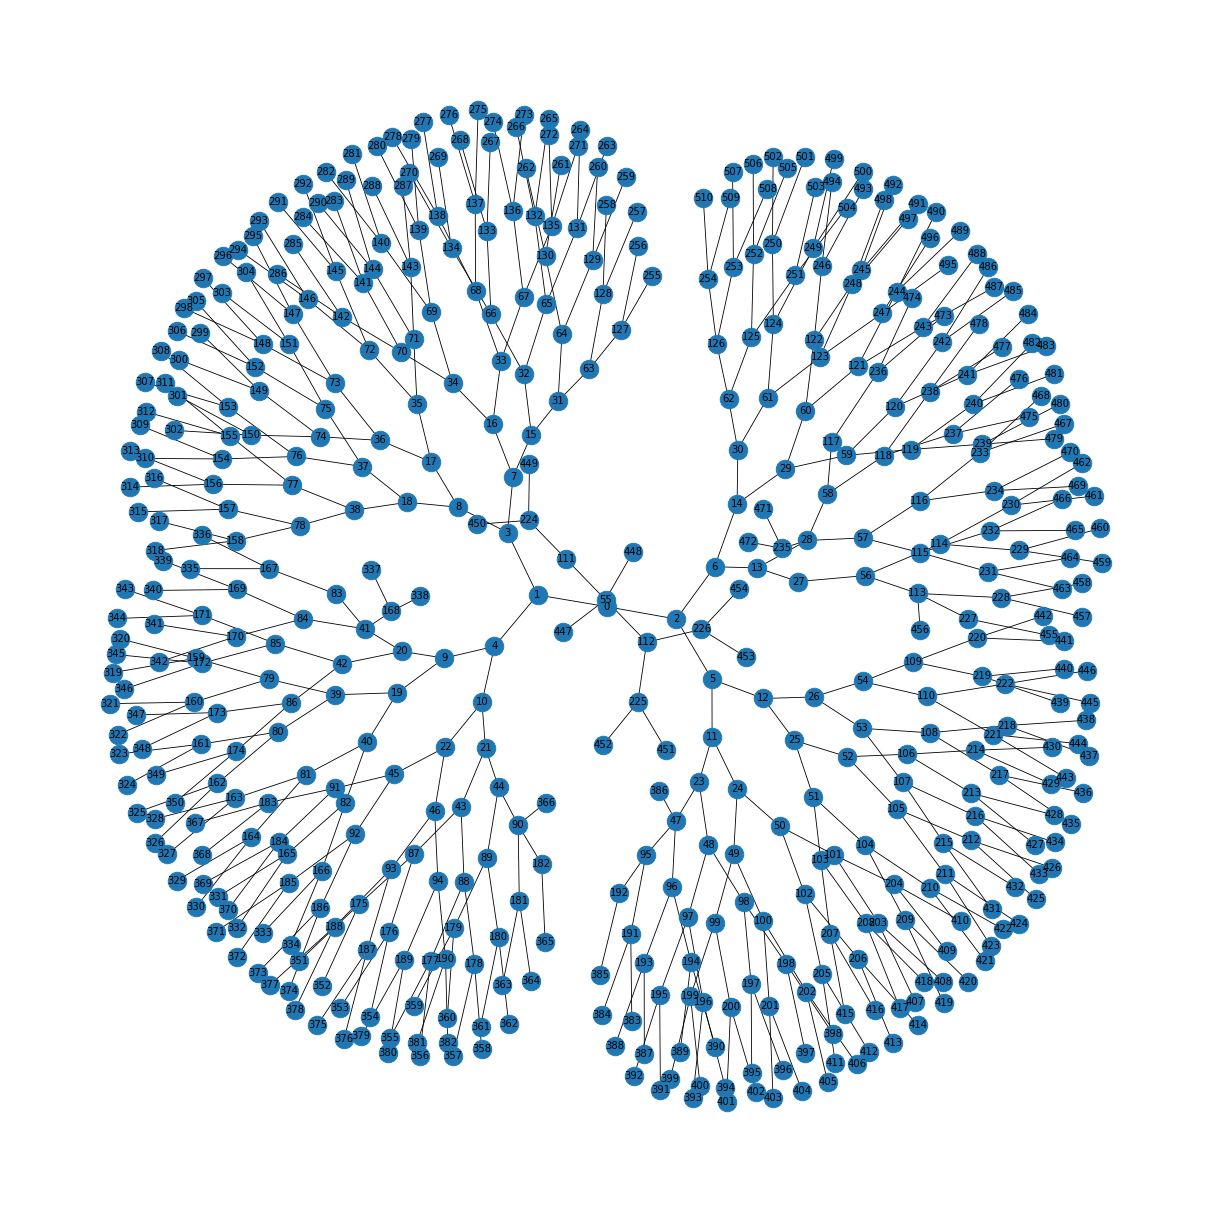

In [8]:
import community.community_louvain as com
 
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id).split('N')[1]
    i+=1
id_map
edgelist = Edges.replace({0 : id_map, 1 : id_map} )
edgelist.columns = ['source','target']

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])


fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)
# partition = com.best_partition(G)  # compute communities
# pos = nx.spring_layout(G)  # compute graph layout
# nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.3)
# plt.show(G)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)

In [24]:
# import matplotlib.pyplot as plt
# import networkx as nx
# import pydot
# from networkx.drawing.nx_pydot import graphviz_layout

# T = nx.balanced_tree(2, 10)

# pos = graphviz_layout(T, prog="twopi")
# fig = plt.figure(1, figsize=(50, 50), dpi=50)
# nx.draw(T, pos)
# plt.show()

In [25]:
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()


In [26]:
vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/simulation_dataset/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/simulation_dataset/mut_rate.csv')

/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

x    1.245079
y    1.260827
r    1.013780
dtype: float64
coef [[0.97039006]]


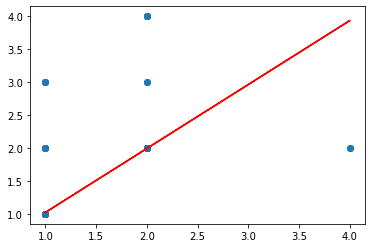

In [60]:
from sklearn import linear_model

mut_rate_all = mut_rate


mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.y / mut_rate_all.x   
print( mut_rate_all.mean())


x = np.array(mut_rate_all[["x"]])
y = np.array(mut_rate_all[["y"]])


regr = linear_model.LinearRegression()
regr.fit(x, y)
print('coef', regr.coef_)
# predictedCO2 = regr.predict([[2300, 1300]])

n_geners = 1
test = np.array([n_geners]).reshape(1, 1)
n_mut_predicted = regr.predict(test)
n_mut_predicted[0][0]

plt.scatter(x, y)
plt.plot(x, regr.predict(x), c = 'r')


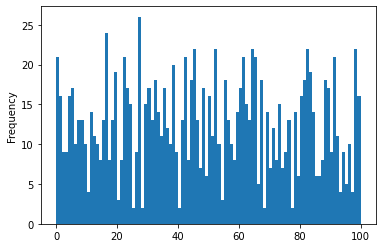

In [28]:
vars = vars_all
ax = vars.pos.plot(kind='hist',bins = 100)

# predict next position (fiting model to vars_all)

In [135]:
print(
    len(
        simulated_dataset
    )
)

simulated_dataset = train_dataset

print(
    len(
        simulated_dataset
    )
)

511
511


In [59]:
# select seq from last generation to mutate
last_gen = 8
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G >= last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# seq0 = meta.iloc[0,2] # to mutate
print(len(last_gen_dataset))

256


1

In [85]:
from sklearn import linear_model

mut_rate_all = mut_rate


mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.y / mut_rate_all.x   
print( mut_rate_all.mean())


x = np.array(mut_rate_all[["x"]])
y = np.array(mut_rate_all[["y"]])



# predict chnaging positions
#mutation distribution
mu, std = scipy.stats.norm.fit(np.array(vars_all['pos'], dtype=int) )
# Mut Rate
regr = linear_model.LinearRegression()
regr.fit(x, y)
N = round(regr.coef_[0][0])
N = 10
## APPLY N Mutation
pos_to_mut = []
for i in range(N):
    pos = np.random.normal(mu, std, size=1 )
    pos_to_mut.append(abs(pos[0]))

pos_to_mut

In [92]:
# add %p mutation to seq
def add_p_mutations(seq, p = 0.1, alphabets='ACTG',mutation_types='SIDTNs', distribution = 'random'): # p = 0 ~ 1 s=skip
    n = int(len(seq) * p )
    for k in range(n):
        type = random.choices(mutation_types,k=1)[0] # randomly select type: SUB INSERT or DELETE  
        if type == 's':
            pass
        if type == 'D':
            seq = del_seq(seq, distribution = distribution)
        elif type == 'I':
            seq = insert_seq(seq,alphabets, distribution = distribution)
        else:
            seq = mutate_seq(seq,alphabets, distribution = distribution)
    return seq

# mutate seq
def mutate_seq(seq, alphabets='ACTG', distribution = 'random'):
    L = len(seq)
    i = random.randint(0, L-1) # position to mutate
    if distribution == 'binomial':
        i = np.random.binomial(L-1, 0.5)
    x = seq[i] #init
    while x == seq[i]: # check if different 
        x = random.choices(alphabets,k=1)[0] # apply mutation if not
    seq = seq[:i] + x + seq[i+1:] # insert new mutated base in sequence
    return seq


In [109]:
c = 0
G = int(id.split(':')[0].replace('Gen','')) + 1
parents = last_gen_dataset
new_dataset = {}
for id in parents:
    #left 
    seq = parents[id] 
    c+=1
    N = round(regr.coef_[0][0])
    for i in range(N):
        ## apply mutation in each position
        pos = abs(round(np.random.normal(mu, std, size=1 )[0]))
        # scipy.optimize.least_squares

        x = seq[i] #init
        while x == seq[i]: # check if different 
            x = random.choices('ATCG',k=1)[0] # apply mutation if not
        right_node = seq[:i] + x + seq[i+1:] # insert the new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=right_node
    # left
    c+=1
    for i in range(N):
        ## apply mutation in each position
        pos = abs(round(np.random.normal(mu, std, size=1 )[0]))
        x = seq[i] #init
        while x == seq[i]: # check if different 
            x = random.choices('ATCG',k=1)[0] # apply mutation if not
        left_node = seq[:i] + x + seq[i+1:] # insert the new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=left_node

predicted_dataset = new_dataset | parents

{'Gen9:N1': 'CCAAATGTGTGAGAACGTCACACTTGTAGCAGTGTGCGAATGTTACTTCTATTGATCACCGCGGGCGACCTGTACCCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N2': 'GCAAATGTGTGAGAACGTCACACTTGTAGCAGTGTGCGAATGTTACTTCTATTGATCACCGCGGGCGACCTGTACCCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N3': 'CCAAATACGTGACAACGACACACTTGTAGCAGTGTACGAATGTTACTTCTATTGATCACAGCGGGCGACGTGTACGCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N4': 'GCAAATACGTGACAACGACACACTTGTAGCAGTGTACGAATGTTACTTCTATTGATCACAGCGGGCGACGTGTACGCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N5': 'GCAAATATGTGACAACGACACACTTGTAGCAGTGTGCGAATGTTACTTCTATTGATCACAGCGGGCGACGTGTACGCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N6': 'CCAAATATGTGACAACGACACACTTGTAGCAGTGTGCGAATGTTACTTCTATTGATCACAGCGGGCGACGTGTACGCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N7': 'GCAAATATGTGACAACGACACACTTGTAGCAGTGTACGAATGTTACTTCTGTTGATCACAGCGGGCGACGTGTCCCCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N8': 'GCAAATATGTGACAACGACACACTTGTAGCAGTGTACGAATGTTACTTCTGTTGATCACAGCGGGCGACGTGTCCCCGTACGAAGTAGTCTAACTGAGTC',
 'Gen9:N9': 'ACAAATATGTGACAACGACACACTTGTAGCATTGTACGAATGTTACTTCTATTGATCAC

In [115]:
from Bio import pairwise2
from Bio import Align

# 1. pairwise align
id = "uniform_dataset"
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

,Gen9:N0,Gen9:N1,Gen9:N2,Gen9:N3,Gen9:N4,Gen9:N5,Gen9:N6,Gen9:N7,Gen9:N8,Gen9:N9,...,Gen8:N501,Gen8:N502,Gen8:N503,Gen8:N504,Gen8:N505,Gen8:N506,Gen8:N507,Gen8:N508,Gen8:N509,Gen8:N510
Gen9:N0,0.0,11.0,11.0,11.0,11.0,11.0,11.0,10.9,11.0,11.0,...,24.0,24.0,21.8,20.8,22.8,20.8,23.0,23.0,21.8,21.8
Gen9:N1,11.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,17.0,17.0,15.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0
Gen9:N2,11.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,17.0,17.0,15.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0
Gen9:N3,11.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,17.0,17.0,15.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0
Gen9:N4,11.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,...,17.0,17.0,15.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gen8:N506,20.8,15.0,15.0,15.0,15.0,15.0,15.0,14.0,15.0,15.0,...,8.0,8.0,3.0,3.0,2.0,0.0,6.0,6.0,6.0,6.0
Gen8:N507,23.0,15.0,15.0,15.0,15.0,15.0,15.0,14.0,15.0,15.0,...,8.0,8.0,6.0,6.0,6.0,6.0,0.0,2.0,4.0,4.0
Gen8:N508,23.0,15.0,15.0,15.0,15.0,15.0,15.0,14.0,15.0,15.0,...,8.0,8.0,6.0,6.0,6.0,6.0,2.0,0.0,4.0,4.0
Gen8:N509,21.8,15.0,15.0,15.0,15.0,15.0,15.0,14.0,15.0,15.0,...,8.0,8.0,6.0,6.0,6.0,6.0,4.0,4.0,0.0,2.0


In [124]:
import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 3
for i in X.index:

    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        for c in list(Y.columns):
            edges.append([i, c])


In [127]:
import community.community_louvain as com
 
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id).split('N')[1]
    i+=1
id_map
edgelist = Edges.replace({0 : id_map, 1 : id_map} )
edgelist.columns = ['source','target']
edgelist

,source,target
0,0,34
1,0,55
2,1,1
3,1,22
4,1,23
...,...,...
2015,508,509
2016,509,510
2017,509,507
2018,510,509


In [129]:
meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])
meta

,Gen,N,seq
0,9,151,TCAAATATGTGAGAACGTCACACTTGTAGCAGTGTGCGAATGTTAC...
1,8,509,CCCAATGTGTGAGAACGACACCCTAGTAGCAGAGTGCGAAACTTAC...
2,8,379,TCAAATGTATGACAACGACAGACTTGTAGCAGTGTGCGCAATTTAC...
3,8,377,TCAAATGTGTGACAACGAAAGACTTGTAGCAGTGTGCGAAAGTTAC...
4,8,402,CCAAAGGTGTGACAACGACACACTCGTAGCCGAGTGCGAAAGTTAC...
...,...,...,...
469,9,99,TCAAATATGTGAGAACGTCACACTTGTAGCAGTGTGCGAATGTTAC...
470,8,362,TCAAATGTGTGCCAACGACAGACTTGTAGCAGTATGCGAAAGTTAC...
471,9,31,TCAAATATGTGAGAACGTCACCCTTGTAGCAGTGTGCGAATGTTAC...
472,8,407,CCAAAAGTGTGACAACGACACACTCGTAGCCGAGTGAGAAAGTTAC...


In [122]:



fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)
# partition = com.best_partition(G)  # compute communities
# pos = nx.spring_layout(G)  # compute graph layout
# nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.3)
# plt.show(G)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)

KeyError: 'Gen5:N55'

In [116]:
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()


In [117]:
vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/simulation_dataset/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/simulation_dataset/mut_rate.csv')

/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1069713/3980063312.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

x    1.245079
y    1.260827
r    1.013780
dtype: float64
coef [[0.97039006]]


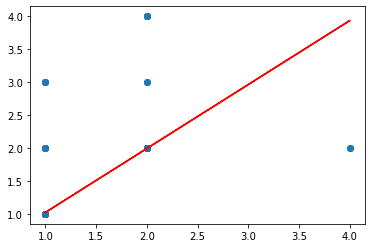

In [118]:
from sklearn import linear_model

mut_rate_all = mut_rate


mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.y / mut_rate_all.x   
print( mut_rate_all.mean())


x = np.array(mut_rate_all[["x"]])
y = np.array(mut_rate_all[["y"]])


regr = linear_model.LinearRegression()
regr.fit(x, y)
print('coef', regr.coef_)
# predictedCO2 = regr.predict([[2300, 1300]])

n_geners = 1
test = np.array([n_geners]).reshape(1, 1)
n_mut_predicted = regr.predict(test)
n_mut_predicted[0][0]

plt.scatter(x, y)
plt.plot(x, regr.predict(x), c = 'r')


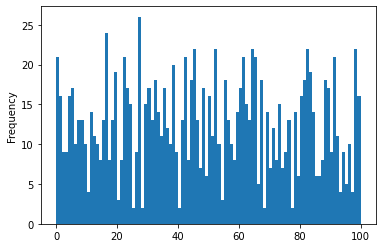

In [119]:
vars = vars_all
ax = vars.pos.plot(kind='hist',bins = 100)